# 1. Introduction

Working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago, and tasked to find patterns in the available information. 
Goal is to understand passenger preferences and the impact of external factors on rides.

Working with a database, will analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

**Description of the data**

Working with datasets with info on taxi rides and weather details in Chicago:

1. **Car Company dataset** - `/datasets/project_sql_result_01.csv`. It contains the following data:
    - `company_name`: taxi company name
    - `trips_amount`: the number of rides for each taxi company on November 15-16, 2017.

2. **City neighborhoods dataset** - `/datasets/project_sql_result_04.csv`. It contains the following data:
    - `dropoff_location_name`: Chicago neighborhoods where rides ended
    - `average_trips`: the average number of rides that ended in each neighborhood in November 2017.

3. **Data Rides dataset** - `/datasets/project_sql_result_07.csv`. It contains data on rides from the Loop to O'Hare International Airport.
    - `start_ts`: pickup date and time
    - `weather_conditions`: weather conditions at the moment the ride started
    - `duration_seconds`: ride duration in seconds







# 2. Initialization

### Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV files
file_1 = 'datasets/moved_project_sql_result_01.csv'
file_2 = 'datasets/moved_project_sql_result_04.csv'
file_3 = 'datasets/moved_project_sql_result_07.csv'

cab_companies = pd.read_csv(file_1)
neighborhoods = pd.read_csv(file_2)
weather = pd.read_csv(file_3)

### General overview of the data

In [3]:
# Quick look at each
print(cab_companies.head())
print()
print(neighborhoods.head())
print()
print(weather.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [4]:
# Check data types
print(cab_companies.info())
print()
print(neighborhoods.info())
print()
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2  

# 3. Exploratory Data Analysis

### Explore Cab Companies

In [5]:
cab_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [27]:
cab_companies.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
highest_ride_companies = cab_companies.sort_values(by='trips_amount', ascending=False).head(20)
highest_ride_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


#### Barplot distribution of taxi companies with top 20 number of rides

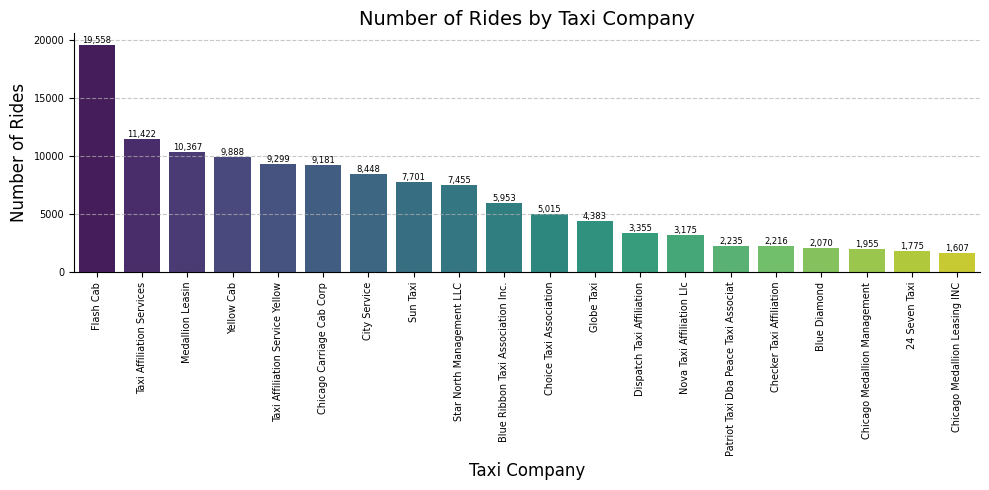

In [28]:
#plot distribution of taxi companies with top 20 number of rides
plt.figure(figsize=(10,5))

sns.barplot(
    data = highest_ride_companies,
    x ='company_name',
    y ='trips_amount',
    palette ="viridis",
    hue='company_name',
    dodge =False,
    legend =False
)

plt.title('Number of Rides by Taxi Company', fontsize=14)
plt.xlabel('Taxi Company', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(fontsize=7, rotation=90)
plt.yticks(fontsize=7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for bar, value in zip(plt.gca().patches, highest_ride_companies["trips_amount"]):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:,.0f}",
                 ha="center", va="bottom", fontsize=6)
    
plt.tight_layout()
plt.show()

**Insight:**

The bar chart displaying the number of rides per taxi company on November 15–16, 2017 reveals that:
- **Flash Cab** and **Taxi Affiliation Services** had the **highest ride volumes**, significantly surpassing smaller companies.
- High ride volumes could also be attributed to brand recognition or established contracts with corporate clients, hotels, or city institutions.
- Conversely, companies with fewer rides may be smaller operators, new entrants, or focus on niche markets like airport-only services or luxury vehicles.
- The concentration of rides among a few major players could alluge to a competitive advantage in either fleet scale or customer trust, potentially pointing to a market with a few dominant providers.

📌 **Takeaway:**
- Ride volume may reflect fleet size, popularity, or logistical efficiency, and dominant companies likely benefit from a combination of these factors.

### Explore Neighborhoods

In [7]:
top_10_locations = neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
top_10_locations

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Barplot distribution of top 10 neighborhoods by number of dropoffs

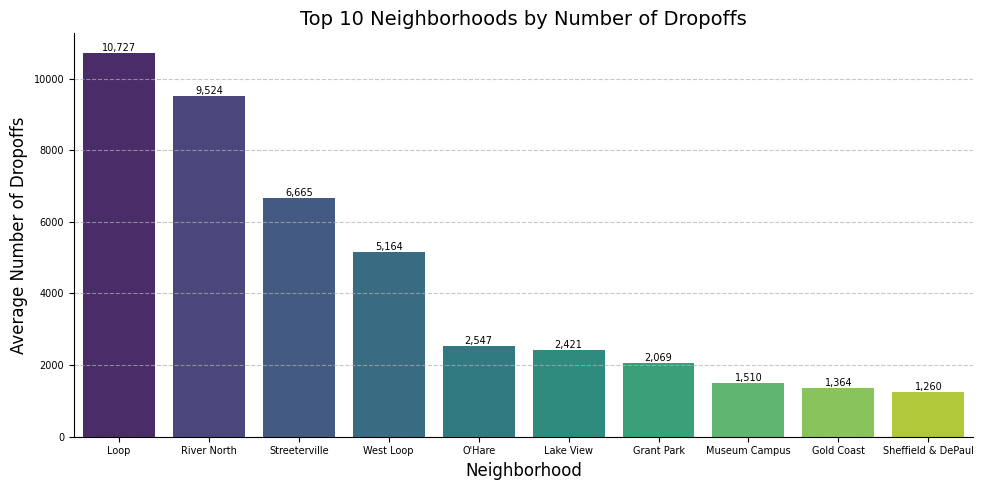

In [9]:
#plot distribution of top 10 neighborhoods by number of dropoffs

# Seaborn bar plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data = top_10_locations,
    x ='dropoff_location_name',
    y ='average_trips',
    palette ="viridis",
    hue ='dropoff_location_name',
    dodge =False,
    legend =False
)

plt.title('Top 10 Neighborhoods by Number of Dropoffs', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Number of Dropoffs', fontsize=12)

plt.xticks(fontsize=7, rotation=0)  # Adjust x-axis tick label font size
plt.yticks(fontsize=7)  # Adjust y-axis tick label font size
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add labels
for bar, value in zip(plt.gca().patches, top_10_locations["average_trips"]):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:,.0f}",
                 ha="center", va="bottom", fontsize=7)

# Display the plot
plt.tight_layout()
plt.show()

**Insight:**

The bar chart showing top 10 drop-off neighborhoods (by average rides in November 2017) provides valuable geographic insight:

- Loop and River North are among the top neighborhoods, and are both:
    - Centrally located
    - Economically and culturally significant
    - Densely populated during both business and leisure hours
    - Major activity centers in the city that drive consistent taxi and ride demand

- Other high-ranking neighborhoods may correspond to:
    - Transportation hubs (e.g., O'Hare, Union Station vicinity)
    - Shopping or tourist areas (e.g., Magnificent Mile, Navy Pier near Near North Side)
    - Hotel-dense areas and business districts with heavy commuter traffic.

- If residential areas appear, they may reflect zones with limited public transit access, causing residents to rely more heavily on taxis.

📌 **Takeaway:**
- The most frequent drop-off locations align with economic, commercial, and travel hubs, indicating that taxi services are most utilized where people work, travel, or socialize.

# 4. Hypothesis Testing

#### Split data into rainy and non-rainy Saturdays

In [ ]:
# set bad weather conditions as rainy, and good weather conditions as non_rainy

rainy = weather[weather['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy = weather[weather['weather_conditions'] == 'Good']['duration_seconds']


#### Inspect for distribution skewness - Histrogram Distribution

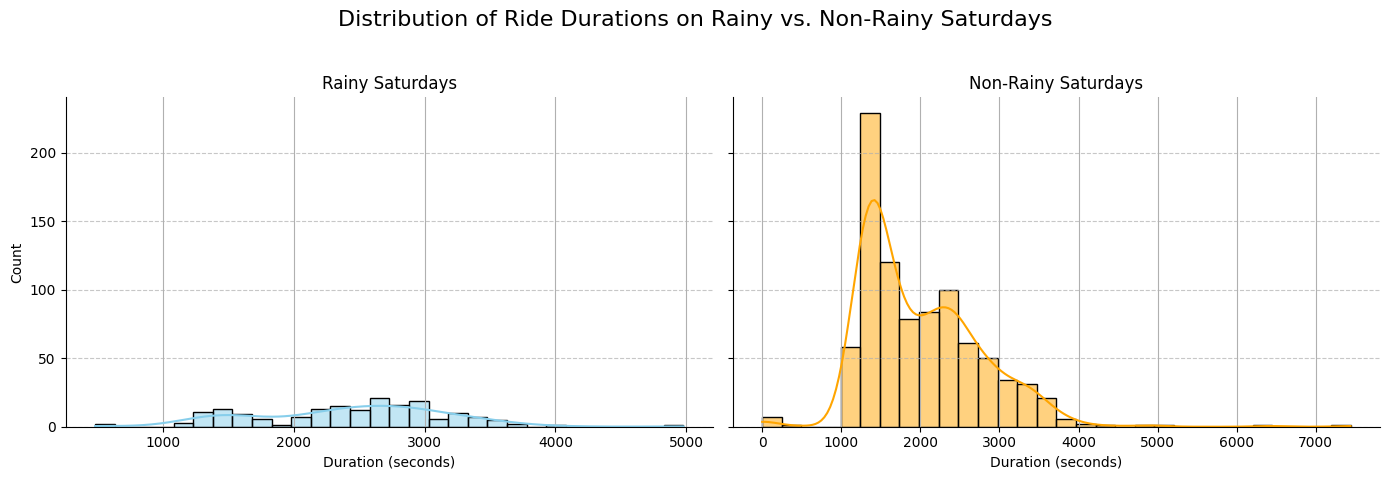

In [22]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot: Rainy Saturdays
sns.histplot(rainy, bins=30, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Rainy Saturdays')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Count')
axes[0].grid(True)

# Remove spines (outline box)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot: Non-Rainy Saturdays
sns.histplot(non_rainy, bins=30, kde=True, ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title('Non-Rainy Saturdays')
axes[1].set_xlabel('Duration (seconds)')
axes[1].grid(True)

# Remove spines (outline box)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Overall layout
fig.suptitle('Distribution of Ride Durations on Rainy vs. Non-Rainy Saturdays', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Histogram Insights**
1. ***Overall shape of distribution:***
    - Both rainy and non-rainy Saturdays have right-skewed distributions, indicating that while most rides are of shorter duration, a few rides take significantly longer.

2. ***Peak (mode):***
    - Non-rainy days tend to have a sharper peak around the shorter ride durations, suggesting more consistency in travel time.
    - Rainy days show a wider spread in durations, possibly due to weather-related delays.

3. ***Spread:***
    - Ride durations on rainy Saturdays are more spread out, showing greater variability.
    - Non-rainy Saturdays have a more compact distribution, indicating more predictable travel times.

#### Inspect for outliers - Boxplot distribution

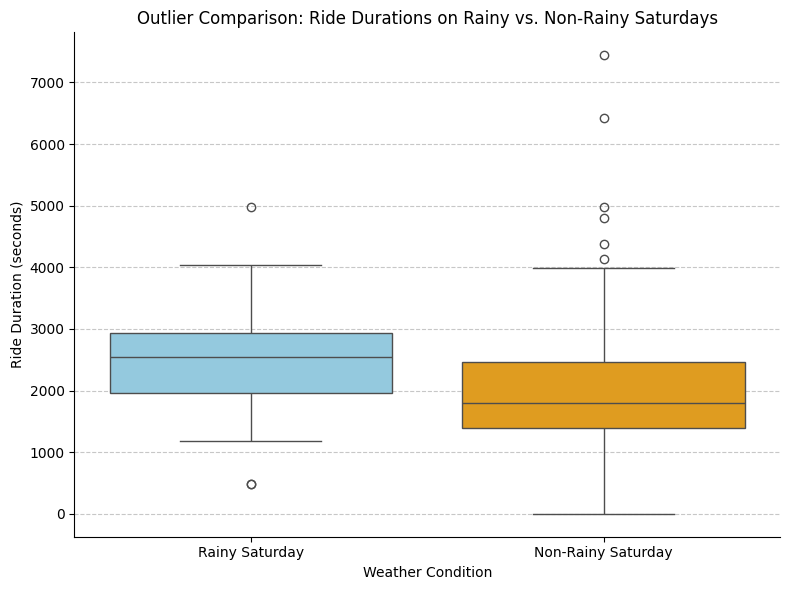

In [26]:
# Combine data into one DataFrame
rainy_df = pd.DataFrame({'duration_seconds': rainy, 'weather': 'Rainy Saturday'})
non_rainy_df = pd.DataFrame({'duration_seconds': non_rainy, 'weather': 'Non-Rainy Saturday'})
combined_df = pd.concat([rainy_df, non_rainy_df])

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=combined_df, 
    x='weather', 
    y='duration_seconds',
    hue='weather', 
    palette=['skyblue', 'orange']
)

# Labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Ride Duration (seconds)')
plt.title('Outlier Comparison: Ride Durations on Rainy vs. Non-Rainy Saturdays')

# Remove spines (outline box)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the plot
plt.tight_layout()
plt.show()

**Boxplot Insights**
1. ***Median duration:***
    - The median ride duration is slightly higher on rainy Saturdays, suggesting trips generally take longer during bad weather.

2. ***Interquartile Range (IQR):***
    - The IQR is wider for rainy Saturdays, reinforcing the idea of greater variability in ride durations.

3. ***Outliers:***
    - Both groups show outliers, but rainy Saturdays have more high-duration outliers, possibly reflecting severe delays or traffic disruptions.
    - The presence of more extreme outliers on rainy days highlights the unpredictability of travel during inclement weather.

#### How the null and alternative hypotheses were formed:

**Test the hypothesis:** ***"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."***

The goal here is to analyze whether rainy weather affects the duration of taxi rides from the Loop to O’Hare International Airport on Saturdays.

- **Null Hypothesis (H₀)**: There is no difference in the average duration of rides between rainy and non-rainy Saturdays. ***(μ₁ = μ₂)***

- **Alternative Hypothesis (H₁)**: There is a difference in the average duration of rides between rainy and non-rainy Saturdays. ***(μ₁ ≠ μ₂)***

This is a two-tailed test because we’re not assuming whether rainy Saturdays are longer or shorter — only that they may be different.

#### Test of Hypothesis Criterion:

**Welch’s t-test**

Using the Welch’s t-test (scipy.stats.ttest_ind(..., equal_var=False)) to compare the means of two independent samples:

- Group 1: Ride durations on rainy Saturdays
- Group 2: Ride durations on non-rainy Saturdays

This test was chosen because:

- The two groups may have unequal variances
- The sample sizes for rainy and non-rainy days could be different
- The Welch's t-test is robust and appropriate for comparing two independent samples with unequal variances

Selected a significance level (α) of 0.05, which is standard in hypothesis testing. This means:
- If p-value < 0.05 → there is statistical evidence to reject the null hypothesis
- If p-value ≥ 0.05 → we fail to reject the null hypothesis, i.e., no evidence of a difference

In [14]:
from scipy.stats import ttest_ind

# Welch’s t-test (unequal variance)
stat, p_value = ttest_ind(rainy, non_rainy, equal_var=False)

print(f'P-value: {p_value:.5f}')
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in duration.")
else:
    print("Fail to reject the null hypothesis: No significant difference in duration.")


P-value: 0.00000
Reject the null hypothesis: There is a significant difference in duration.


**Mann–Whitney U test**

Using Mann–Whitney U test, a non-parametric statistical test that compares the distributions of two independent samples. This test has been chosen because:

1. **The data may not be normally distributed**
    - Ride durations can often be skewed due to traffic patterns, weather delays, or outliers. The Mann–Whitney U test does not require the assumption of normality, making it a safer choice than parametric tests like the t-test.

2. **Unequal sample sizes and variances**
    - The number of rides on rainy versus non-rainy Saturdays is likely different. The Mann–Whitney U test is robust to these differences.

3. **Comparison of two independent groups**
    - The rainy and non-rainy Saturday ride durations are independent — no rider is in both groups — and the Mann–Whitney U test is designed specifically for this type of comparison.

4. **Compares medians, not means**
    - Since we’re interested in how durations might change under different weather conditions — especially when the data may be skewed — comparing medians gives a more accurate picture of the central tendency.

In [15]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(rainy, non_rainy, alternative='two-sided')

print(f"P-value: {p_value:.5f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ride durations.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride durations.")


P-value: 0.00000
Reject the null hypothesis: There is a significant difference in ride durations.


# 5. Conclusion

Visual analysis suggests that weather conditions do influence ride duration, with rainy Saturdays showing more variability, longer median rides, and more outliers. This supports the hypothesis that ride duration behavior differs under rainy conditions, though a statistical test (like the Mann–Whitney U test) is necessary to confirm significance.